# NVIDIA Stonk Analysis NVDA

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import datetime as dt 
import yfinance as yf
import seaborn as sns

from scipy.stats import linregress

from IPython.display import Markdown as md
from datetime import datetime as dt

import os

stock = 'NVDA'
excel_file = f'{stock}_data_all.xlsx'

## NVIDIA Info (From Yahoo Finance)

In [3]:
nvidia = yf.Ticker(stock)
print(nvidia.history(period="max"))

                                 Open        High         Low       Close  \
Date                                                                        
1999-01-22 00:00:00-05:00    0.040125    0.044783    0.035587    0.037618   
1999-01-25 00:00:00-05:00    0.040603    0.042036    0.037618    0.041559   
1999-01-26 00:00:00-05:00    0.042036    0.042872    0.037737    0.038334   
1999-01-27 00:00:00-05:00    0.038453    0.039409    0.036303    0.038215   
1999-01-28 00:00:00-05:00    0.038215    0.038453    0.037856    0.038095   
...                               ...         ...         ...         ...   
2024-10-28 00:00:00-04:00  143.000000  143.139999  140.050003  140.520004   
2024-10-29 00:00:00-04:00  140.289993  142.259995  138.899994  141.250000   
2024-10-30 00:00:00-04:00  139.539993  140.330002  136.809998  139.339996   
2024-10-31 00:00:00-04:00  137.600006  137.610001  132.110001  132.759995   
2024-11-01 00:00:00-04:00  134.660004  136.690002  134.570007  136.681000   

In [3]:
nvidia.info

{'address1': '2788 San Tomas Expressway',
 'city': 'Santa Clara',
 'state': 'CA',
 'zip': '95051',
 'country': 'United States',
 'phone': '408 486 2000',
 'website': 'https://www.nvidia.com',
 'industry': 'Semiconductors',
 'industryKey': 'semiconductors',
 'industryDisp': 'Semiconductors',
 'sector': 'Technology',
 'sectorKey': 'technology',
 'sectorDisp': 'Technology',
 'longBusinessSummary': "NVIDIA Corporation provides graphics and compute and networking solutions in the United States, Taiwan, China, Hong Kong, and internationally. The Graphics segment offers GeForce GPUs for gaming and PCs, the GeForce NOW game streaming service and related infrastructure, and solutions for gaming platforms; Quadro/NVIDIA RTX GPUs for enterprise workstation graphics; virtual GPU or vGPU software for cloud-based visual and virtual computing; automotive platforms for infotainment systems; and Omniverse software for building and operating metaverse and 3D internet applications. The Compute & Networki

In [4]:
nvidia.actions

,Dividends,Stock Splits
Date,,
2000-06-27 00:00:00-04:00,0.000000,2.0
2001-09-10 00:00:00-04:00,0.000000,2.0
2006-04-07 00:00:00-04:00,0.000000,2.0
2007-09-11 00:00:00-04:00,0.000000,1.5
2012-11-20 00:00:00-05:00,0.001875,0.0
2013-02-26 00:00:00-05:00,0.001875,0.0
2013-05-21 00:00:00-04:00,0.001875,0.0
2013-08-20 00:00:00-04:00,0.001875,0.0
2013-11-19 00:00:00-05:00,0.002125,0.0


In [5]:
nvidia.analyst_price_targets

{'current': 132.76,
 'low': 75.4,
 'high': 202.79,
 'mean': 148.87,
 'median': 150.0}

In [6]:
nvidia.balance_sheet

,2024-01-31,2023-01-31,2022-01-31,2021-01-31,2020-01-31
Treasury Shares Number,NaN,NaN,NaN,13800000000.0,13700576960.0
Ordinary Shares Number,24640000000.0,24661365720.0,25060000000.0,24800000000.0,NaN
Share Issued,24640000000.0,24661365720.0,25060000000.0,38600000000.0,NaN
Net Debt,2429000000.0,7564000000.0,8956000000.0,6116000000.0,NaN
Total Debt,11056000000.0,12031000000.0,11831000000.0,7597000000.0,NaN
...,...,...,...,...,...
Allowance For Doubtful Accounts Receivable,NaN,NaN,NaN,-21000000.0,-11000000.0
Gross Accounts Receivable,NaN,NaN,NaN,2450000000.0,1668000000.0
Cash Cash Equivalents And Short Term Investments,25984000000.0,13296000000.0,21208000000.0,11561000000.0,NaN
Other Short Term Investments,18704000000.0,9907000000.0,19218000000.0,10714000000.0,NaN


## Download data

In [80]:
data = yf.download(stock)

# Convert the index to timezone-naive
data.index = data.index.tz_localize(None)

# Save the data to an Excel file
data.to_excel(excel_file, sheet_name=stock)

print(f'All available data for {stock} has been saved to {os.getcwd()}\\{excel_file}')

[*********************100%***********************]  1 of 1 completed


All available data for NVDA has been saved to C:\Users\zanel\NVDA_data_all.xlsx


In [86]:
data.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA,NVDA
Date,,,,,,
1999-01-22,0,0,0,0,0,2714688000
1999-01-25,0,0,0,0,0,510480000
1999-01-26,0,0,0,0,0,343200000
1999-01-27,0,0,0,0,0,244368000
1999-01-28,0,0,0,0,0,227520000


## Load data

In [16]:
data = pd.read_excel(excel_file, header=[0,1], index_col=0 , sheet_name=stock)
data.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA,NVDA
Date,,,,,,
1999-01-22,0.037618,0.041016,0.048828,0.038802,0.043750,2714688000
1999-01-25,0.041559,0.045313,0.045833,0.041016,0.044271,510480000
1999-01-26,0.038334,0.041797,0.046745,0.041146,0.045833,343200000
1999-01-27,0.038215,0.041667,0.042969,0.039583,0.041927,244368000
1999-01-28,0.038095,0.041536,0.041927,0.041276,0.041667,227520000


## Stock Plot

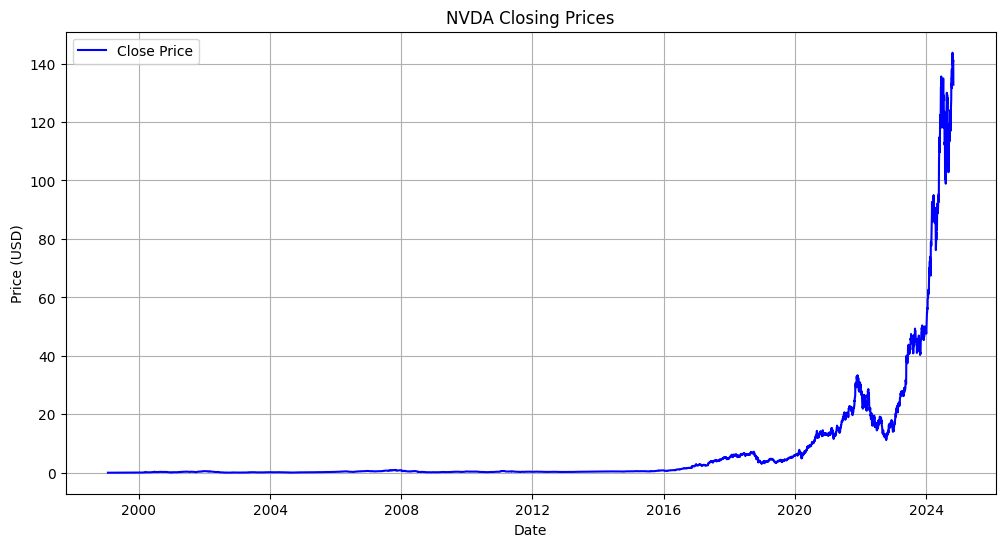

In [8]:
# Create a larger plot
plt.figure(figsize=(12, 6))  # Set the figure size (width, height) in inches

# Plot the closing prices
plt.plot(data['Close'], label='Close Price', color='blue')

# Add title and labels
plt.title(f'{stock} Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()

# Show the plot
plt.grid()
plt.show()

## Data Transform

In [19]:
data['Daily Returns'] = data['Close'].pct_change().values.flatten().tolist()


# Calculate the 50-day and 200-day moving averages
data['50-Day MA'] = data['Close'].rolling(window=50).mean().values.flatten().tolist()
data['100-Day MA'] = data['Close'].rolling(window=100).mean().values.flatten().tolist()
data['200-Day MA'] = data['Close'].rolling(window=200).mean().values.flatten().tolist()

# Calculate cumulative returns
data['Cumulative Returns'] = (1 + data['Daily Returns']).cumprod() - 1


# Define the parameters for Bollinger Bands
window = 20  # Window size for moving average
num_std_dev = 2  # Number of standard deviations

# Calculate the moving average
data['Moving Average'] = data['Close'].rolling(window=window).mean()

# Calculate the rolling standard deviation
data['Rolling Std Dev'] = data['Close'].rolling(window=window).std()

# Calculate Bollinger Bands
# https://www.investopedia.com/articles/technical/102201.asp#:~:text=Bollinger%20Bands%C2%AE%20are%20highly,third%20for%20the%20moving%20average.
# https://www.britannica.com/money/bollinger-bands-indicator
data['Upper Band'] = data['Moving Average'] + (data['Rolling Std Dev'] * num_std_dev)
data['Lower Band'] = data['Moving Average'] - (data['Rolling Std Dev'] * num_std_dev)

# Create a numeric index for the regression
data['Time'] = np.arange(len(data))

In [32]:
# Create a numeric index for the regression
data['Time'] = np.arange(len(data))

## Analysis

Here, we look into the historical data of NVIDIA, purely from data POV. We do not include any sentiment (hype, news, policices) and business decisions/directions.

### 1. Summary Statistics

In [88]:
data.head()

Price,Adj Close,Close,High,Low,Open,Volume,Daily Returns
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA,NVDA,
Date,,,,,,,
1999-01-22,0,0,0,0,0,2714688000,NaN
1999-01-25,0,0,0,0,0,510480000,0
1999-01-26,0,0,0,0,0,343200000,-0
1999-01-27,0,0,0,0,0,244368000,-0
1999-01-28,0,0,0,0,0,227520000,-0


In [74]:
# Show size of the dataset
data.shape

(6487, 7)

In [75]:
data.dtypes

Price          Ticker
Adj Close      NVDA      float64
Close          NVDA      float64
High           NVDA      float64
Low            NVDA      float64
Open           NVDA      float64
Volume         NVDA        int64
Daily Returns            float64
dtype: object

In [89]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6487 entries, 1999-01-22 to 2024-10-31
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, NVDA)  6487 non-null   float64
 1   (Close, NVDA)      6487 non-null   float64
 2   (High, NVDA)       6487 non-null   float64
 3   (Low, NVDA)        6487 non-null   float64
 4   (Open, NVDA)       6487 non-null   float64
 5   (Volume, NVDA)     6487 non-null   int64  
 6   (Daily Returns, )  6486 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 405.4 KB


In [90]:
data.describe()

Price,Adj Close,Close,High,Low,Open,Volume,Daily Returns
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA,NVDA,
count,"6,487","6,487","6,487","6,487","6,487","6,487","6,486"
mean,7,7,8,7,7,"603,069,518",0
std,20,20,20,19,20,"431,259,062",0
min,0,0,0,0,0,"19,680,000",-0
25%,0,0,0,0,0,"342,790,000",-0
50%,0,0,0,0,0,"503,973,000",0
75%,4,4,4,4,4,"734,596,000",0
max,144,144,144,142,143,"9,230,856,000",0


### 2. Time Series Visualization

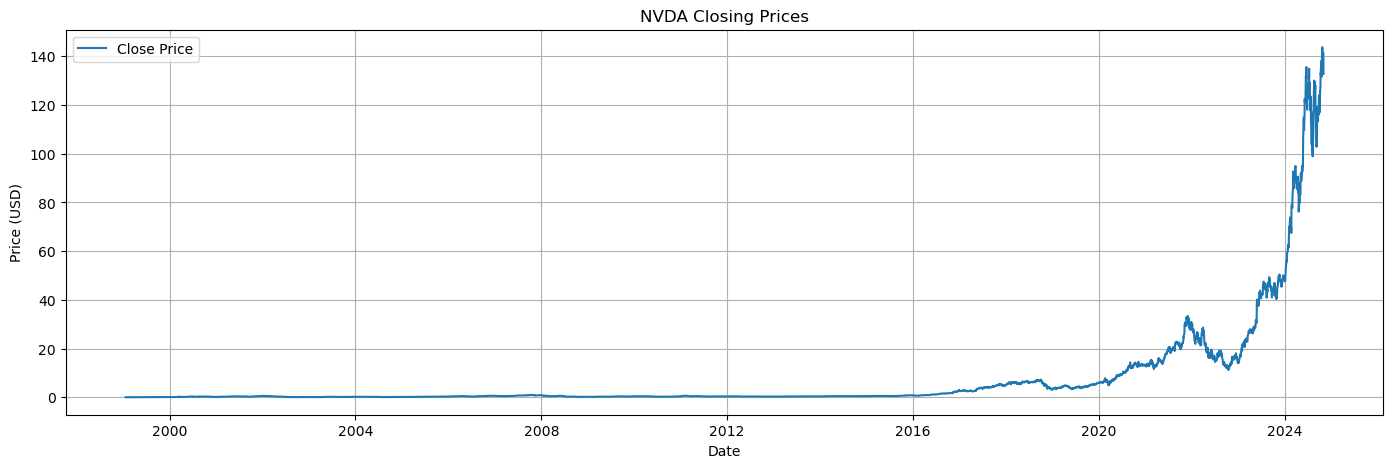

In [15]:
# Closing price over time
plt.figure(figsize=(17, 5))
plt.plot(data['Close'], label='Close Price')
plt.title(f'{stock} Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid()
plt.show()

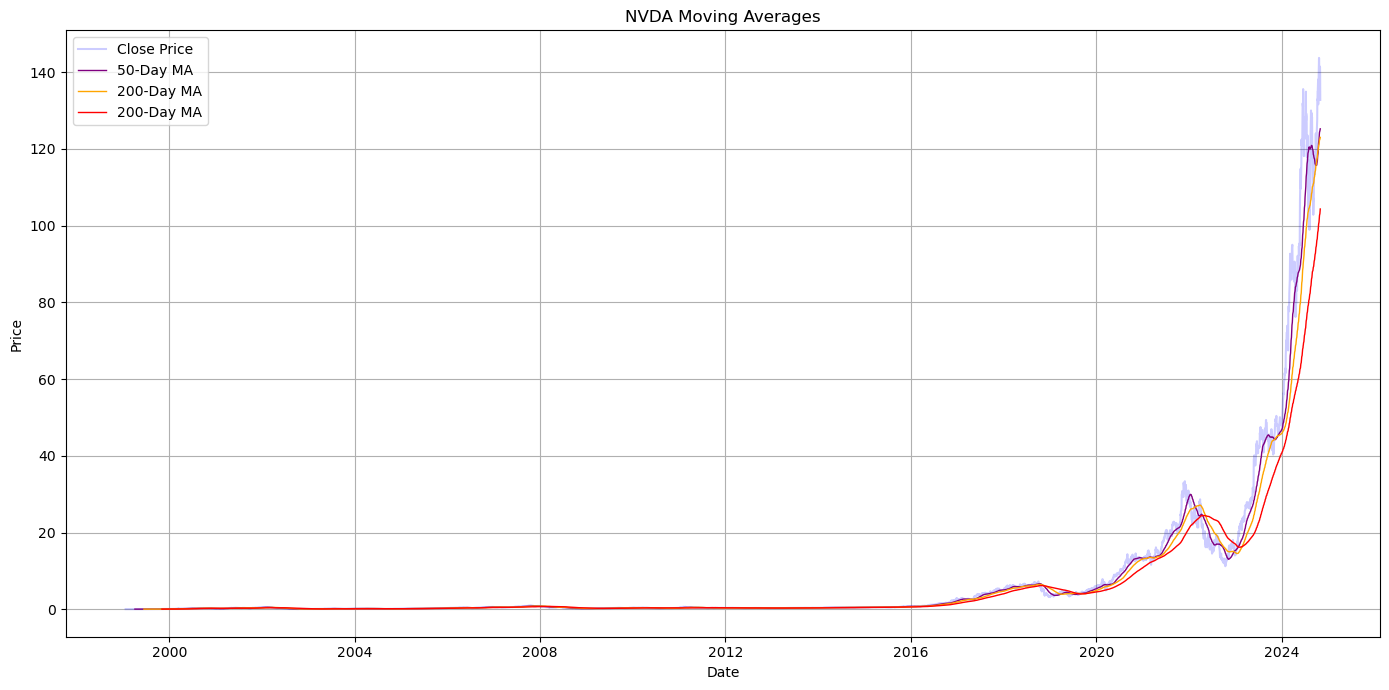

In [17]:
# Create a plot
plt.figure(figsize=(14, 7))

# Plot the closing price
plt.plot(data['Close'], label='Close Price', color='blue', alpha=0.2)

# Plot the moving averages
plt.plot(data['50-Day MA'], label='50-Day MA', color='purple', linewidth=1)
plt.plot(data['100-Day MA'], label='200-Day MA', color='orange', linewidth=1)
plt.plot(data['200-Day MA'], label='200-Day MA', color='red', linewidth=1)

# Add titles and labels
plt.title(f'{stock} Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()

# Show the plot
plt.tight_layout()
plt.show()

In [18]:
post_year = 2015
post_year_data = data[data['Close'].index.year >= post_year]

In [19]:
md(f'#### Post year {post_year}')

#### Post year 2015

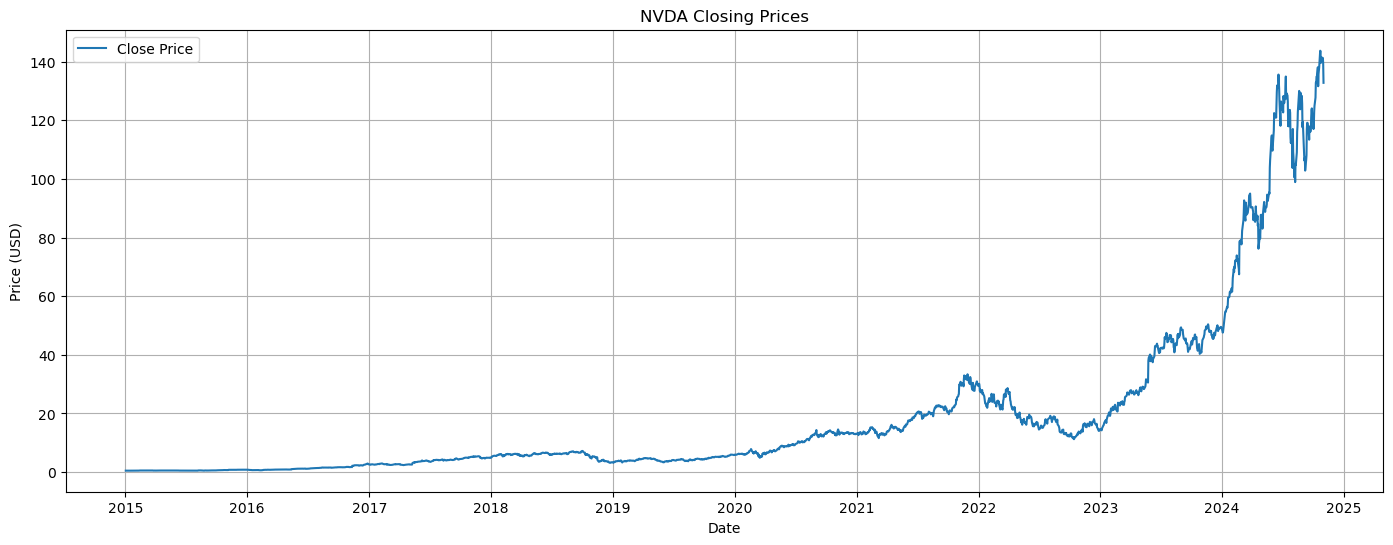

In [20]:
# Closing price over time
plt.figure(figsize=(17, 6))
plt.plot(post_year_data['Close'], label='Close Price')
plt.title(f'{stock} Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid()
plt.show()

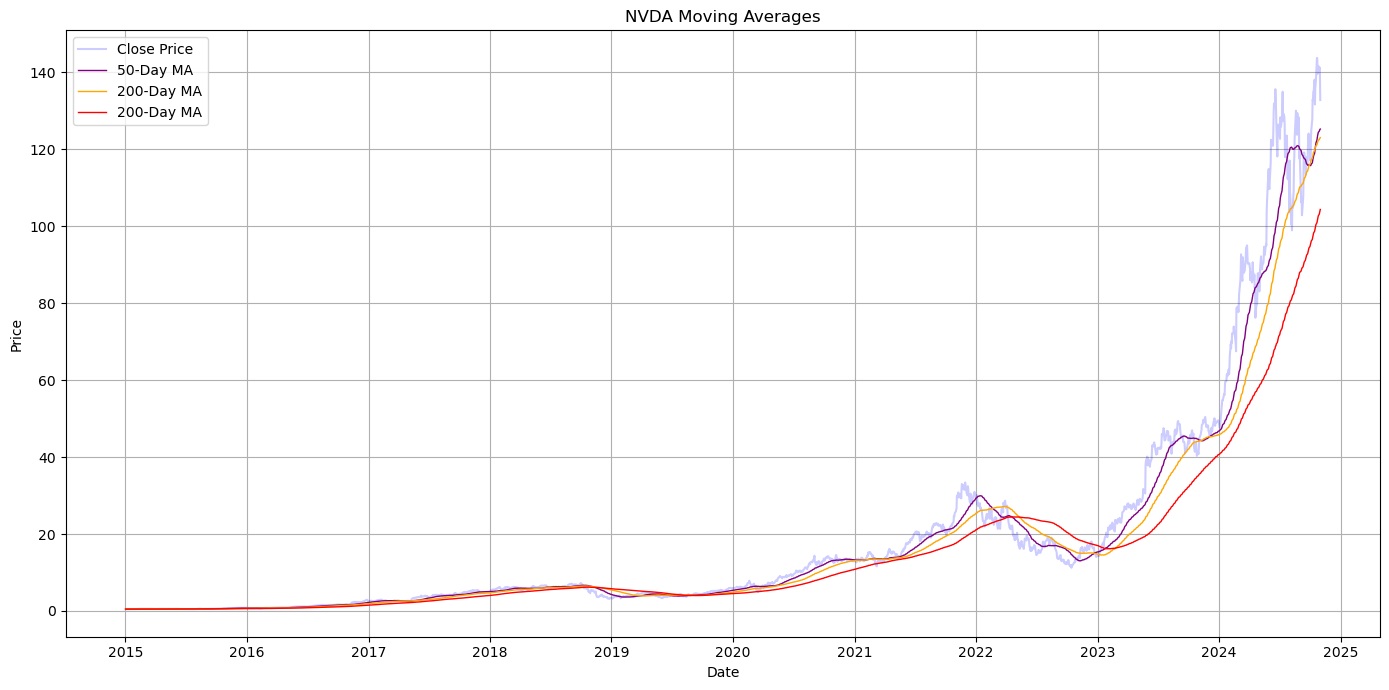

In [21]:
# Create a plot
plt.figure(figsize=(14, 7))

# Plot the closing price
plt.plot(post_year_data['Close'], label='Close Price', color='blue', alpha=0.2)

# Plot the moving averages
plt.plot(post_year_data['50-Day MA'], label='50-Day MA', color='purple', linewidth=1)
plt.plot(post_year_data['100-Day MA'], label='200-Day MA', color='orange', linewidth=1)
plt.plot(post_year_data['200-Day MA'], label='200-Day MA', color='red', linewidth=1)

# Add titles and labels
plt.title(f'{stock} Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()

# Show the plot
plt.tight_layout()
plt.show()

### 3. Returns Analysis 

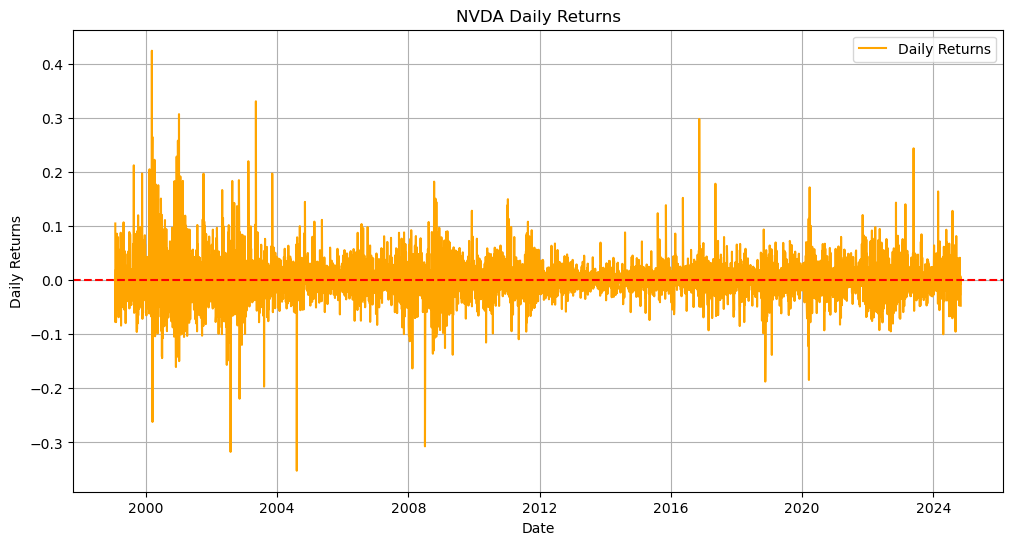

In [22]:
# Daily returns
plt.figure(figsize=(12, 6))
plt.plot(data['Daily Returns'], label='Daily Returns', color='orange')
plt.title(f'{stock} Daily Returns')
plt.xlabel('Date')
plt.ylabel('Daily Returns')
plt.axhline(0, color='red', linestyle='--')
plt.legend()
plt.grid()
plt.show()

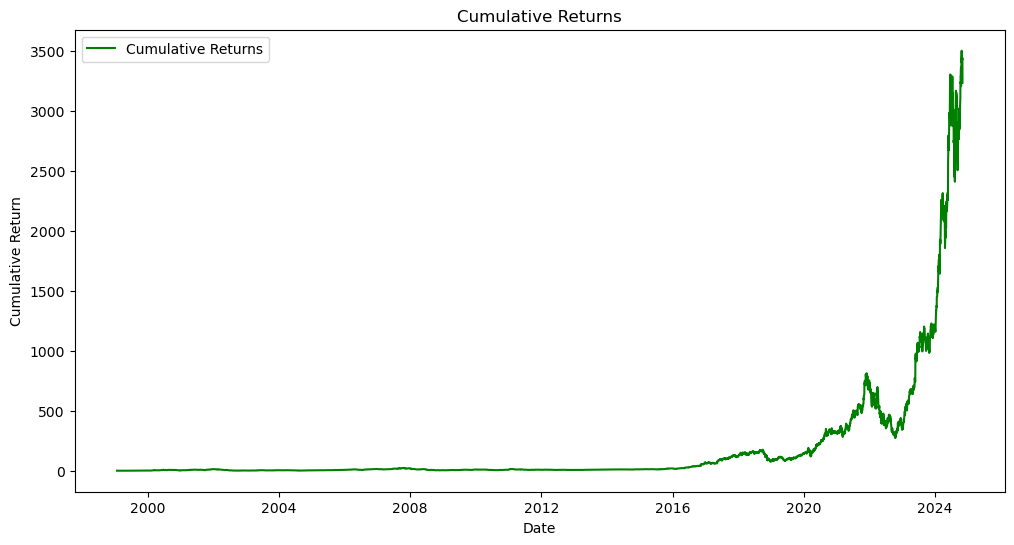

In [24]:
plt.figure(figsize=(12, 6))
plt.plot(data['Cumulative Returns'], label='Cumulative Returns', color='green')
plt.title('Cumulative Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.show()

But this is assuming you bought at day one, not real, lets be for real, we'll take past a certain date 

In [25]:
# Define the day, month, and year
day = 1
month = 1
year = 2024

# Create a datetime object
date = pd.to_datetime(f"{year}-{month:02d}-{day:02d}")

In [14]:
def get_formatted_date(d, m, y):
    day = date.day
    month_name = date.strftime('%B')  # Full month name
    year = date.year

    # Function to get the ordinal suffix
    def ordinal(n):
        suffix = ['th', 'st', 'nd', 'rd'] + ['th'] * 16
        if 10 <= n % 100 <= 20:
            return str(n) + 'th'
        else:
            return str(n) + suffix[n % 10]

    # Format the date
    return f"{ordinal(day)} of {month_name} {year}"

In [27]:
# Get the day, month, and year
formatted_date = get_formatted_date(day, month, year)

In [28]:
md(f"Let's say we bought at date {formatted_date}")

Let's say we bought at date 1st of January 2024

In [29]:
post_date_data = data[data['Close'].index >= date]

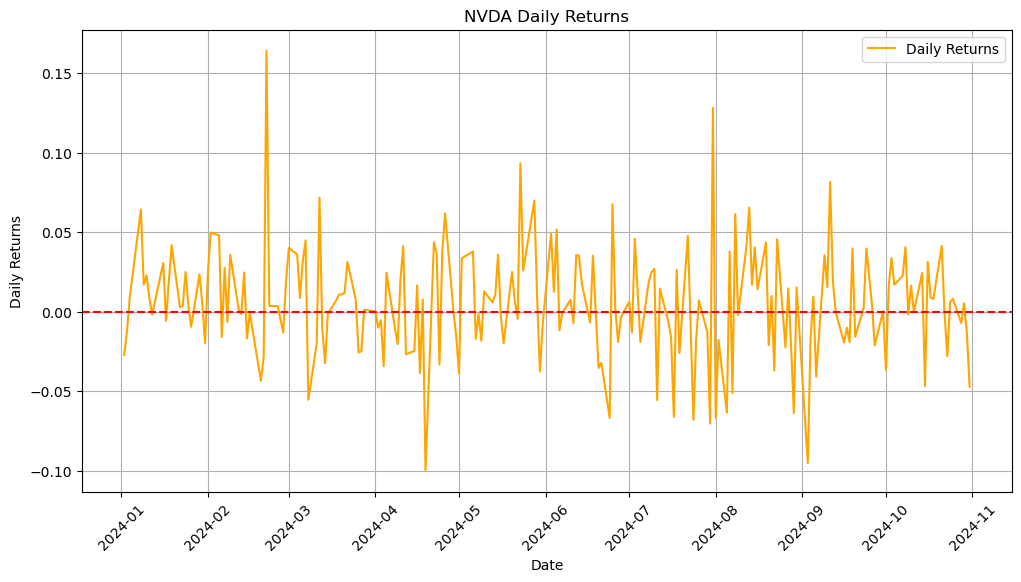

In [30]:
# Daily returns
plt.figure(figsize=(12, 6))
plt.plot(post_date_data['Daily Returns'], label='Daily Returns', color='orange')
plt.title(f'{stock} Daily Returns')
plt.xlabel('Date')
plt.ylabel('Daily Returns')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.axhline(0, color='red', linestyle='--')
plt.legend()
plt.grid()
plt.show()

In [31]:
if 'Cumulative Return' in post_date_data.columns:
    post_date_data = post_date_data.drop(columns=["Cumulative Return"])
else:
    print("The 'Cumulative Return' column does not exist.")


The 'Cumulative Return' column does not exist.


In [32]:
# Calculate cumulative returns
post_date_data['Cumulative Returns'] = (1 + post_date_data['Daily Returns']).cumprod() - 1

C:\Users\zanel\AppData\Local\Temp\ipykernel_32044\2772962091.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  post_date_data['Cumulative Returns'] = (1 + post_date_data['Daily Returns']).cumprod() - 1


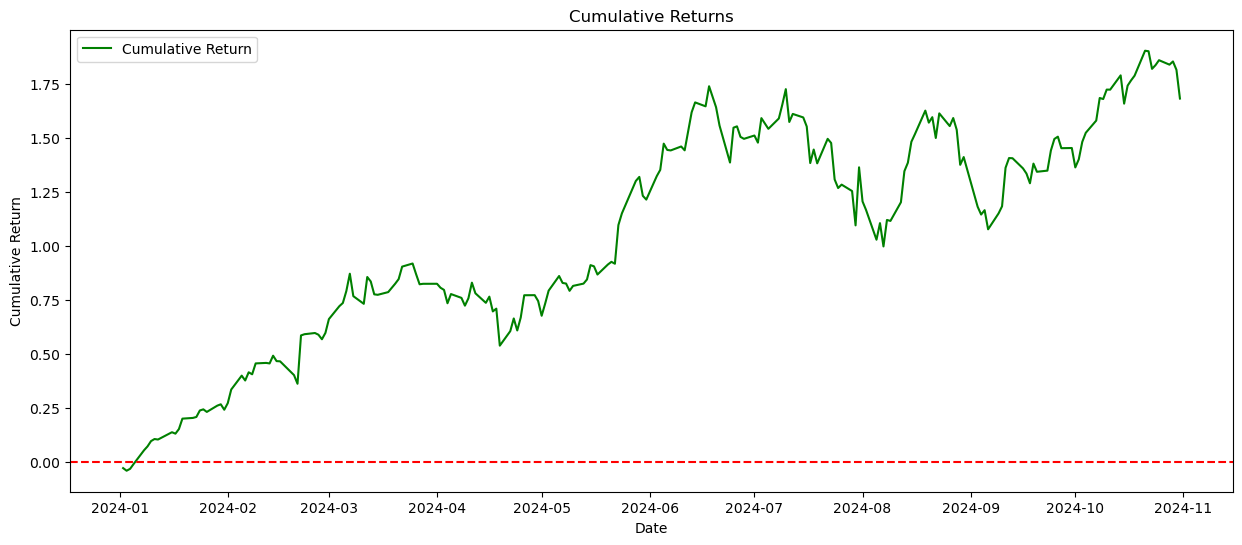

In [33]:
plt.figure(figsize=(15, 6))
plt.plot(post_date_data['Cumulative Returns'], label='Cumulative Return', color='green')
plt.title('Cumulative Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.axhline(0, color='red', linestyle='--')
plt.legend()
plt.show()

The 'Cumulative Return' column does not exist.


C:\Users\zanel\AppData\Local\Temp\ipykernel_32044\947138770.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  post_date_data['Cumulative Returns'] = (1 + post_date_data['Daily Returns']).cumprod() - 1


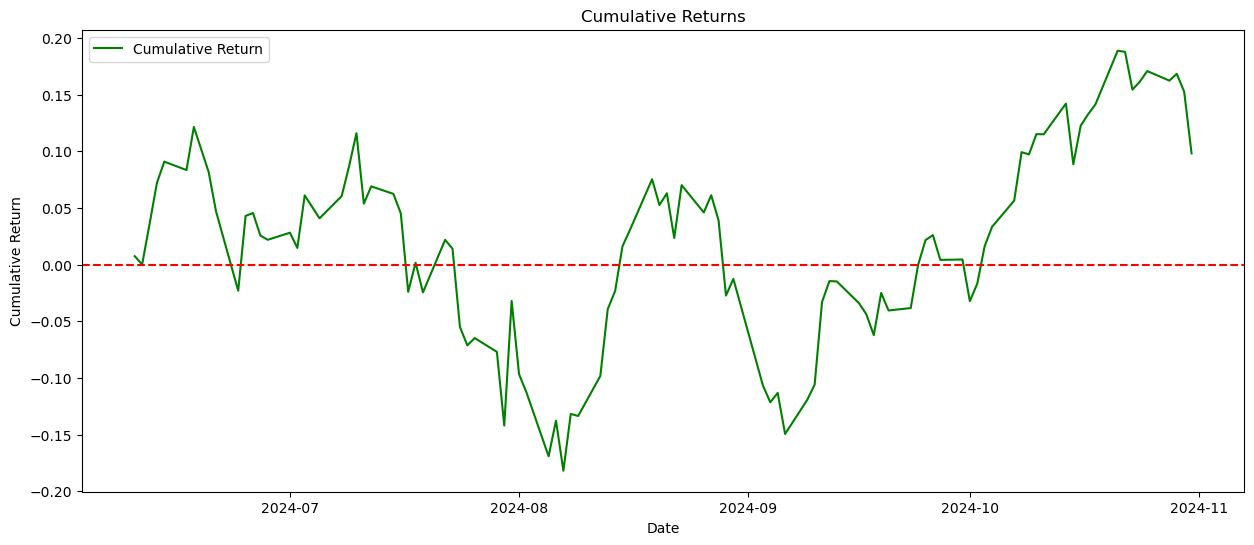

In [34]:
# Define the day, month, and year
day = 10
month = 6
year = 2024

# Create a datetime object
date = pd.to_datetime(f"{year}-{month:02d}-{day:02d}")

post_date_data = data[data['Close'].index >= date]

if 'Cumulative Return' in post_date_data.columns:
    post_date_data = post_date_data.drop(columns=["Cumulative Return"])
else:
    print("The 'Cumulative Return' column does not exist.")


# Calculate cumulative returns
post_date_data['Cumulative Returns'] = (1 + post_date_data['Daily Returns']).cumprod() - 1

plt.figure(figsize=(15, 6))
plt.plot(post_date_data['Cumulative Returns'], label='Cumulative Return', color='green')
plt.title('Cumulative Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.axhline(0, color='red', linestyle='--')
plt.legend()
plt.show()

### 4. Volume Analysis 

In [120]:
# print(data['Volume'].mean())

# Set display option to show floats in absolute decimal format
pd.options.display.float_format = '{:,.0f}'.format

# reset display format
# pd.options.display.float_format = None

print(data['Volume'].describe())
pd.reset_option('display.float_format')


Ticker          NVDA
count          6,487
mean     603,069,518
std      431,259,062
min       19,680,000
25%      342,790,000
50%      503,973,000
75%      734,596,000
max    9,230,856,000


In [36]:
average_volume = data['Volume'].mean().values.flatten()[0]
# Print the average trading volume
print(f'Average Trading Volume for {stock}: {average_volume:,.0f}')

Average Trading Volume for NVDA: 603,069,518


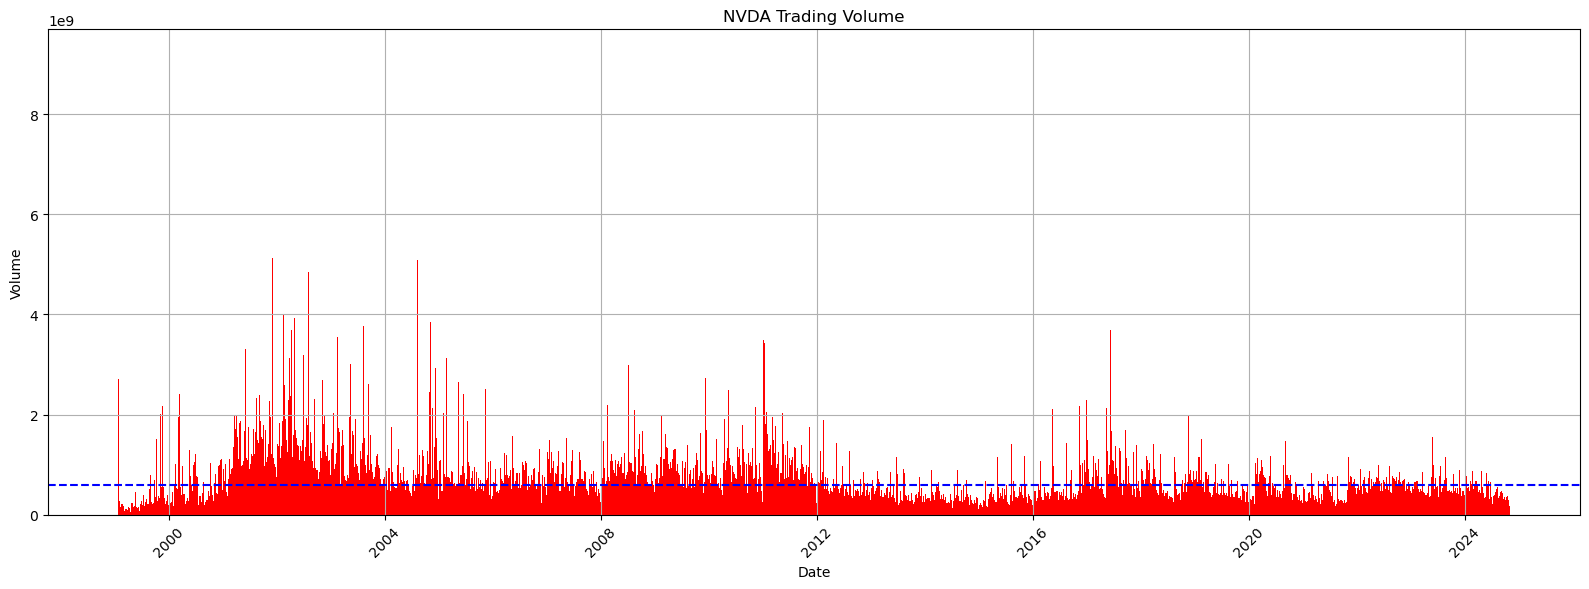

In [37]:
# Volume over time
plt.figure(figsize=(16, 6))
# plt.bar(data.index, data['Volume'], color='grey')
plt.bar(data.index, data['Volume'].values.reshape(len(data)), color='red', width=5.0)
plt.title(f'{stock} Trading Volume')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.axhline(average_volume, color='blue', linestyle='--')
plt.grid()
plt.tight_layout()  # Adjust layout to fit labels
plt.show()

In [38]:
# Define the day, month, and year
day = 10
month = 6
year = 2024

# Create a datetime object
date = pd.to_datetime(f"{year}-{month:02d}-{day:02d}")


post_date_data = data[data['Volume'].index >= date]
md(f"Let's look at dates after {get_formatted_date(day, month, year)}")

Let's look at dates after 10th of June 2024

In [91]:
post_date_data['Volume'].describe()

Ticker,NVDA
count,101
mean,"310,944,770"
std,"94,794,264"
min,"157,593,600"
25%,"246,191,600"
50%,"294,335,100"
75%,"362,975,900"
max,"655,484,700"


In [92]:
post_average_volume = post_date_data['Volume'].mean().values.flatten()[0]
# Print the average trading volume
print(f'Average Trading Volume for {stock}: {post_average_volume:,.0f}')

Average Trading Volume for NVDA: 310,944,770


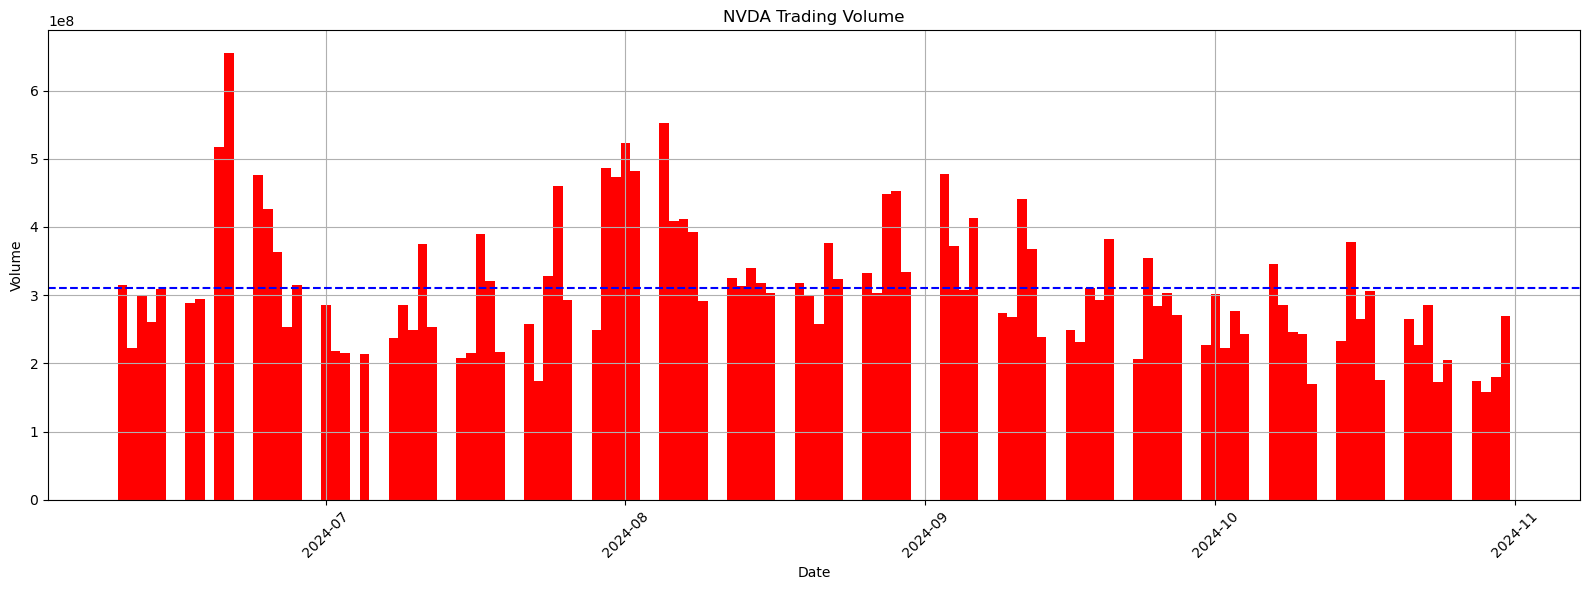

In [41]:
# Volume over time
plt.figure(figsize=(16, 6))
# plt.bar(data.index, data['Volume'], color='grey')
plt.bar(post_date_data.index, post_date_data['Volume'].values.reshape(len(post_date_data)), color='red', width=1.0)
plt.title(f'{stock} Trading Volume')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.axhline(post_average_volume, color='blue', linestyle='--')
plt.grid()
plt.tight_layout()  # Adjust layout to fit labels
plt.show()

#### Does stock split affect Volume?

IMPORTANT NOTE 

yahoo finance close price is adjusted for splits 
while 
adj close is adjusted for split and dividend 

https://stackoverflow.com/questions/59799567/how-does-yahoo-finance-calculate-adjusted-close-stock-prices

In [42]:
nvidia_actions_df = nvidia.actions

# Convert the index to timezone-unaware
nvidia_actions_df.index = nvidia_actions_df.index.tz_convert('UTC').tz_localize(None)   ## NOT IDEMPOTENT

In [43]:
nvidia_stock_split_info = nvidia_actions_df[nvidia_actions_df['Stock Splits'] > 0.0]
nvidia_stock_split_info

,Dividends,Stock Splits
Date,,
2000-06-27 04:00:00,0,2
2001-09-10 04:00:00,0,2
2006-04-07 04:00:00,0,2
2007-09-11 04:00:00,0,2
2021-07-20 04:00:00,0,4
2024-06-10 04:00:00,0,10


##### Plot Volume Change with split change

In [44]:
# Define the midpoint date
midpoint_date = data.index[len(data) // 2]
midpoint_date

Timestamp('2011-12-09 00:00:00')

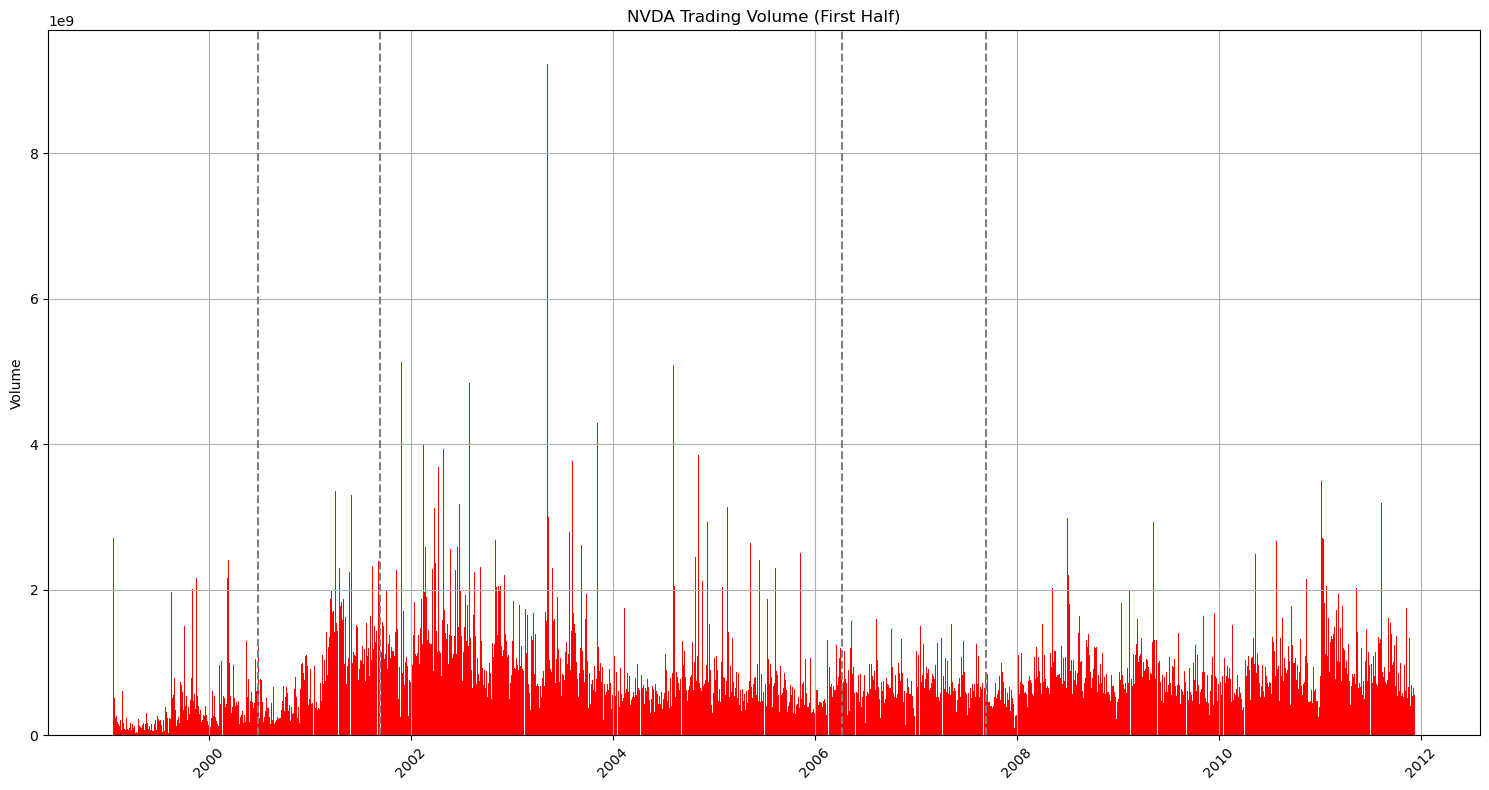

In [45]:
first_half = data[data.index <= midpoint_date]
split_dates_first_half = nvidia_stock_split_info[nvidia_stock_split_info.index <= midpoint_date]

# Plot first half of the data in the first 
plt.figure(figsize=(15, 8))
plt.bar(first_half.index, first_half['Volume'].values.reshape(len(first_half)), color='red', width=3.0)
plt.title(f'{stock} Trading Volume (First Half)')
plt.ylabel('Volume')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

for split_date in split_dates_first_half.index:
    plt.axvline(x=split_date, color='grey', linestyle='--', label='Stock Split')

# plt.ylim(0, data['Volume'].max())  # Set y-axis limit
plt.grid()
plt.tight_layout()  # Adjust layout to fit labels
plt.show()

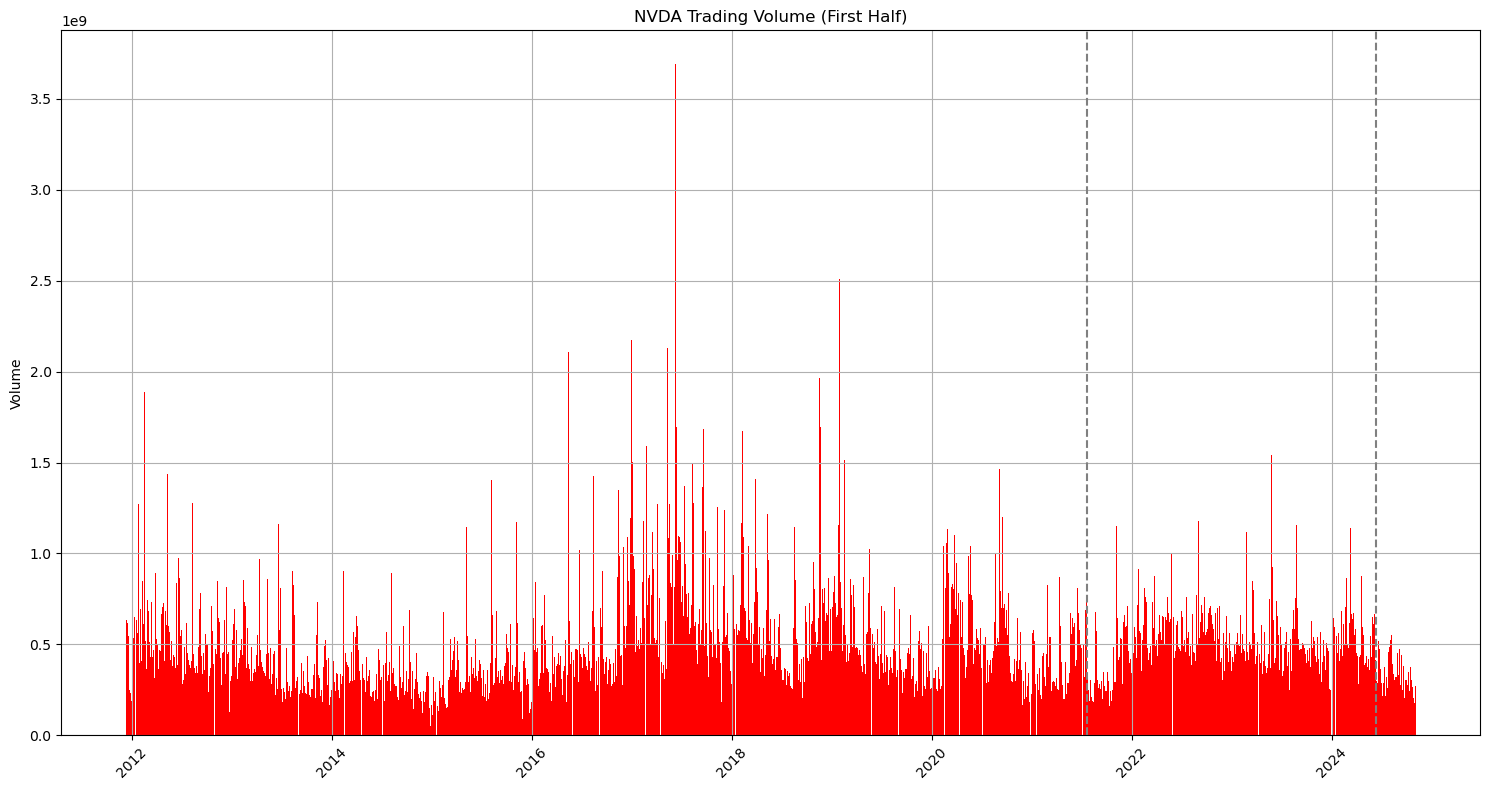

In [46]:
second_half = data[data.index > midpoint_date]
split_dates_second_half = nvidia_stock_split_info[nvidia_stock_split_info.index > midpoint_date]

# Plot first half of the data in the first 
plt.figure(figsize=(15, 8))
plt.bar(second_half.index, second_half['Volume'].values.reshape(len(second_half)), color='red', width=3.0)
plt.title(f'{stock} Trading Volume (First Half)')
plt.ylabel('Volume')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

for split_date in split_dates_second_half.index:
    plt.axvline(x=split_date, color='grey', linestyle='--', label='Stock Split')

# plt.ylim(0, data['Volume'].max())  # Set y-axis limit
plt.grid()
plt.tight_layout()  # Adjust layout to fit labels
plt.show()

Visually, it doesn't seem like stock split affects volume. In reality, it does but yahoo finance Close price is adjusted according to the stock split so in this context, it doesn't seem to affect trader immediate behaviour. 

Maybe we can look into long term behavior of stock split?

### 5. Volatility Analysis

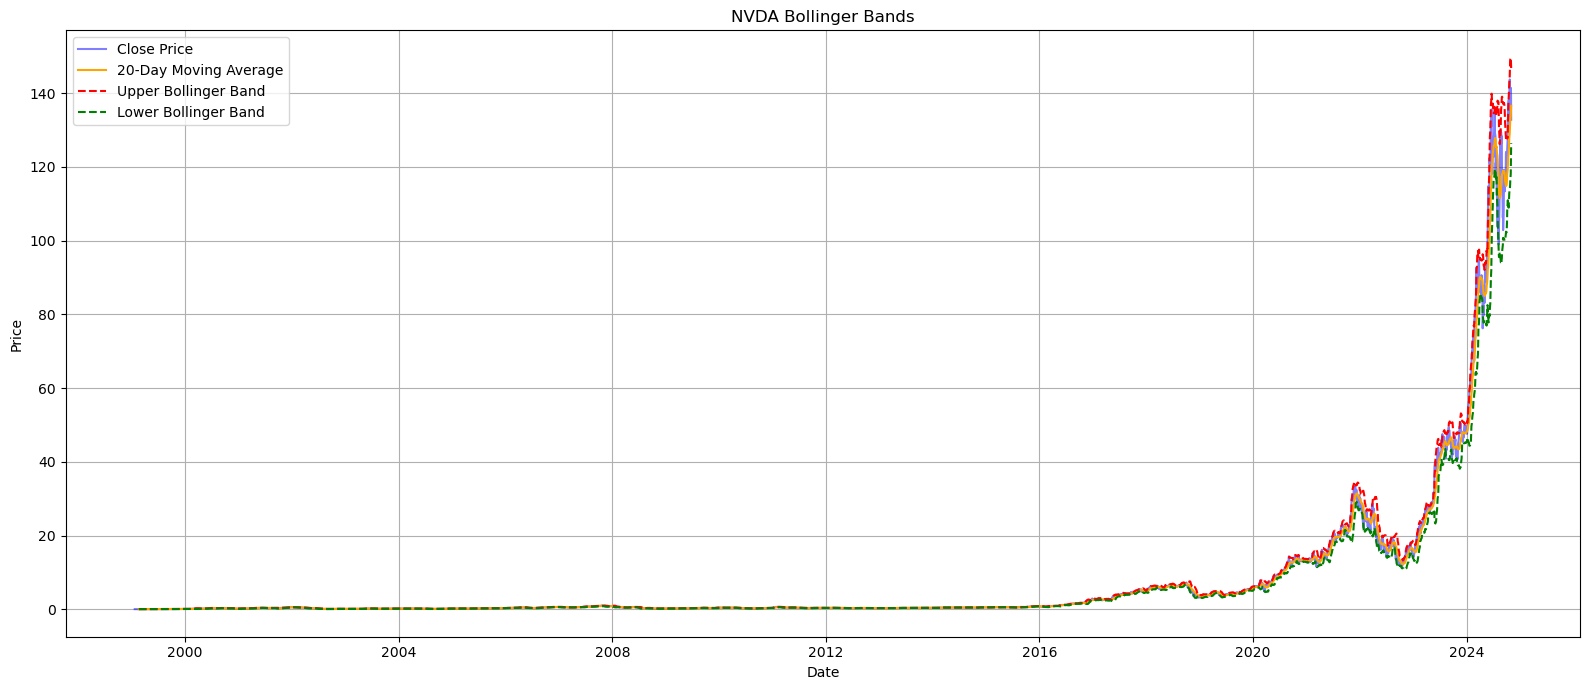

In [93]:
# Create a plot
plt.figure(figsize=(16, 7))

# Plot the closing price and Bollinger Bands
plt.plot(data['Close'], label='Close Price', color='blue', alpha=0.5)
plt.plot(data['Moving Average'], label='20-Day Moving Average', color='orange')
plt.plot(data['Upper Band'], label='Upper Bollinger Band', color='red', linestyle='--')
plt.plot(data['Lower Band'], label='Lower Bollinger Band', color='green', linestyle='--')

# Add titles and labels
plt.title(f'{stock} Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()

# Show the plot
plt.tight_layout()
plt.show()

In [94]:
# Define the day, month, and year
day = 1
month = 1
year = 2018

# Create a datetime object
date = pd.to_datetime(f"{year}-{month:02d}-{day:02d}")

In [122]:
data.describe()

Price,Adj Close,Close,High,Low,Open,Volume,Daily Returns,Moving Average,Rolling Std Dev,Upper Band,Lower Band
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA,NVDA,,,,,
count,6487.000000,6487.000000,6487.000000,6487.000000,6487.000000,6.487000e+03,6486.000000,6468.000000,6468.000000,6468.000000,6468.000000
mean,7.364105,7.390773,7.526947,7.241086,7.389653,6.030695e+08,0.001958,7.208809,0.410320,8.029449,6.388168
std,19.871771,19.869265,20.247578,19.455950,19.879116,4.312591e+08,0.037857,19.206360,1.244108,21.533749,16.924793
min,0.031289,0.034115,0.035547,0.033333,0.034896,1.968000e+07,-0.352336,0.035742,0.000825,0.037496,0.030939
25%,0.255922,0.279042,0.287000,0.271599,0.279084,3.427900e+08,-0.016293,0.279038,0.011944,0.315998,0.238335
50%,0.432767,0.462000,0.468250,0.455000,0.461500,5.039730e+08,0.001296,0.461187,0.023368,0.498692,0.422522
75%,4.344044,4.373875,4.445625,4.308125,4.385375,7.345960e+08,0.018334,4.351178,0.174477,4.744698,3.951221
max,143.710007,143.710007,144.419998,141.779999,143.000000,9.230856e+09,0.424148,136.539500,11.898994,149.540436,126.410291


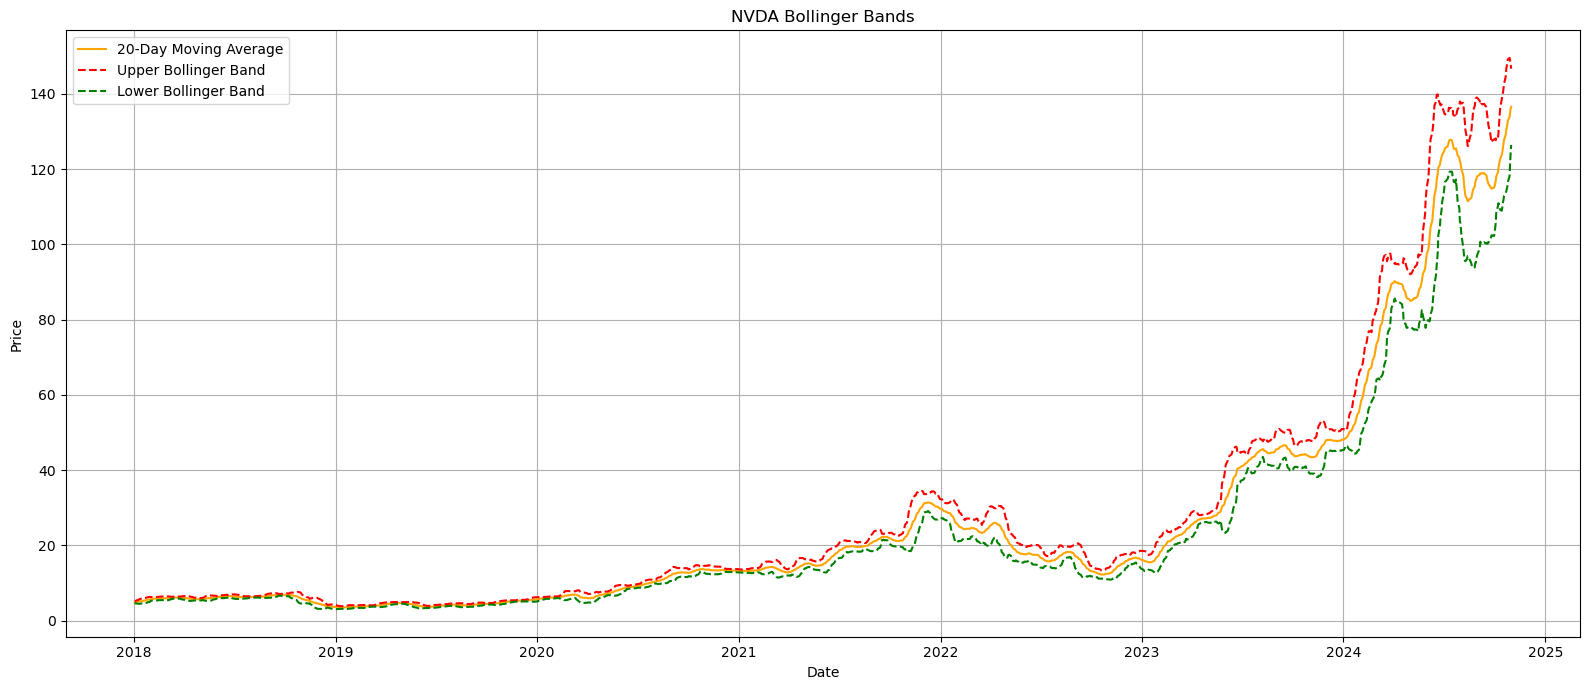

In [97]:
# Create a plot
plt.figure(figsize=(16, 7))

# Plot the closing price and Bollinger Bands
# plt.plot(data[data.index >= date]['Close'], label='Close Price', color='blue', alpha=0.5)
plt.plot(data[data.index >= date]['Moving Average'], label='20-Day Moving Average', color='orange')
plt.plot(data[data.index >= date]['Upper Band'], label='Upper Bollinger Band', color='red', linestyle='--')
plt.plot(data[data.index >= date]['Lower Band'], label='Lower Bollinger Band', color='green', linestyle='--')

# Add titles and labels
plt.title(f'{stock} Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()

# Show the plot
plt.tight_layout()
plt.show()

### 6. Correlation Analysis

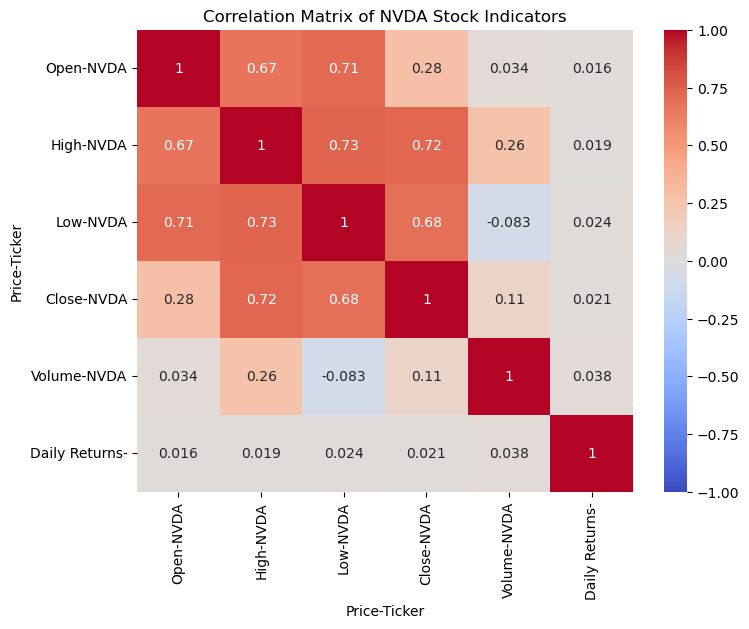

In [125]:
# Select columns for correlation analysis: Open, High, Low, Close, Volume
indicators = data[['Open', 'High', 'Low', 'Close', 'Volume', 'Daily Returns']].pct_change()

# Drop any missing values to ensure a complete dataset
indicators.dropna(inplace=True)

# Calculate the correlation matrix
correlation_matrix = indicators.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title(f"Correlation Matrix of {stock} Stock Indicators")
plt.show()

### 7. Distribution Analysis

C:\Users\zanel\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\zanel\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


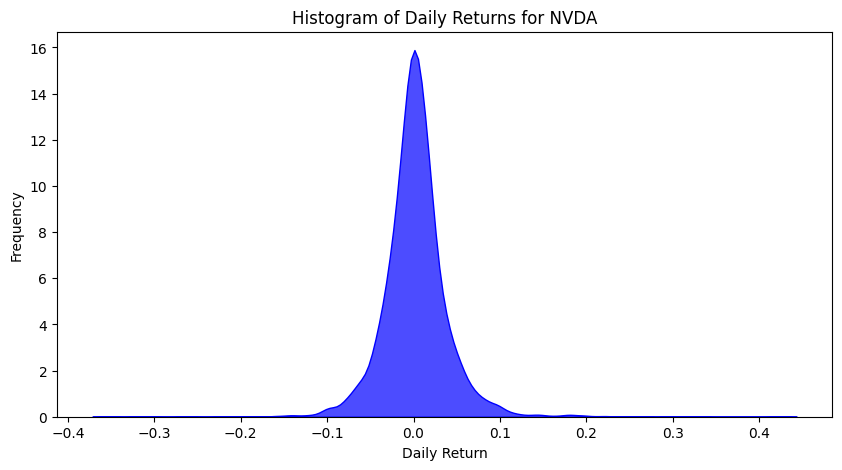

In [21]:
# Plot Histogram of Daily Returns
plt.figure(figsize=(10, 5))
# sns.histplot(daily_returns, bins=100, kde=True, color='skyblue')
sns.kdeplot(data["Daily Returns"], fill=True, color='blue', alpha=0.7)
plt.title(f"Histogram of Daily Returns for {stock}")
plt.xlabel("Daily Return")
plt.ylabel("Frequency")
plt.show()


C:\Users\zanel\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


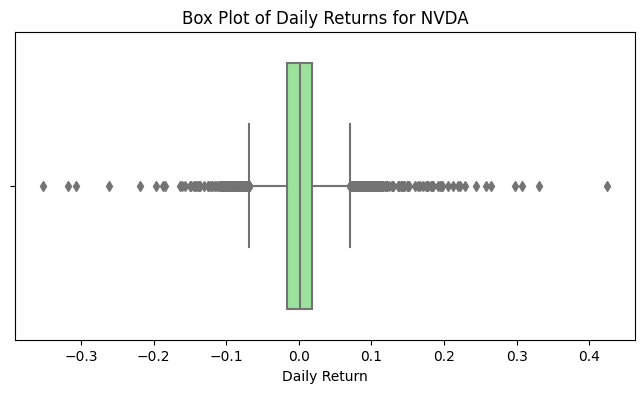

In [30]:
# Plot Box Plot of Daily Returns
plt.figure(figsize=(8, 4))
sns.boxplot(x=data["Daily Returns"], color='lightgreen')
plt.title(f"Box Plot of Daily Returns for {stock}")
plt.xlabel("Daily Return")
plt.show()


C:\Users\zanel\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\zanel\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\zanel\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\zanel\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

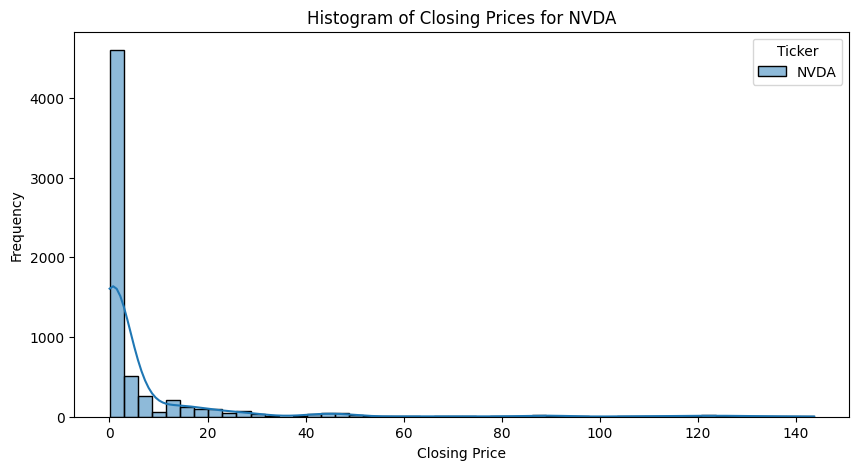

In [23]:
# Plot Histogram of Closing Prices
plt.figure(figsize=(10, 5))
sns.histplot(data['Close'], bins=50, kde=True, color='orange')
plt.title(f"Histogram of Closing Prices for {stock}")
plt.xlabel("Closing Price")
plt.ylabel("Frequency")
plt.show()

In [28]:
data['Close']

Ticker,NVDA
Date,
1999-01-22,0.041016
1999-01-25,0.045313
1999-01-26,0.041797
1999-01-27,0.041667
1999-01-28,0.041536
...,...
2024-10-25,141.539993
2024-10-28,140.520004
2024-10-29,141.250000


### 8. Trend Analysis

In [49]:
# Fit a linear regression model
slope, intercept, r_value, p_value, std_err = linregress(data['Time'].values, data['Close'].values.flatten())

In [51]:
# Print the results in a formatted way
print("Linear Regression Results:")
print(f"{'Parameter':<15}{'Value':<10}")
print(f"{'-'*25}")
print(f"{'Slope':<15}{slope:<10.5f}")
print(f"{'Intercept':<15}{intercept:<10.5f}")
print(f"{'R-value':<15}{r_value:<10.5f}")
print(f"{'P-value':<15}{p_value:<10.5f}")
print(f"{'Standard Error':<15}{std_err:<10.5f}")

Linear Regression Results:
Parameter      Value     
-------------------------
Slope          0.00568   
Intercept      -11.02290 
R-value        0.53518   
P-value        0.00000   
Standard Error 0.00011   


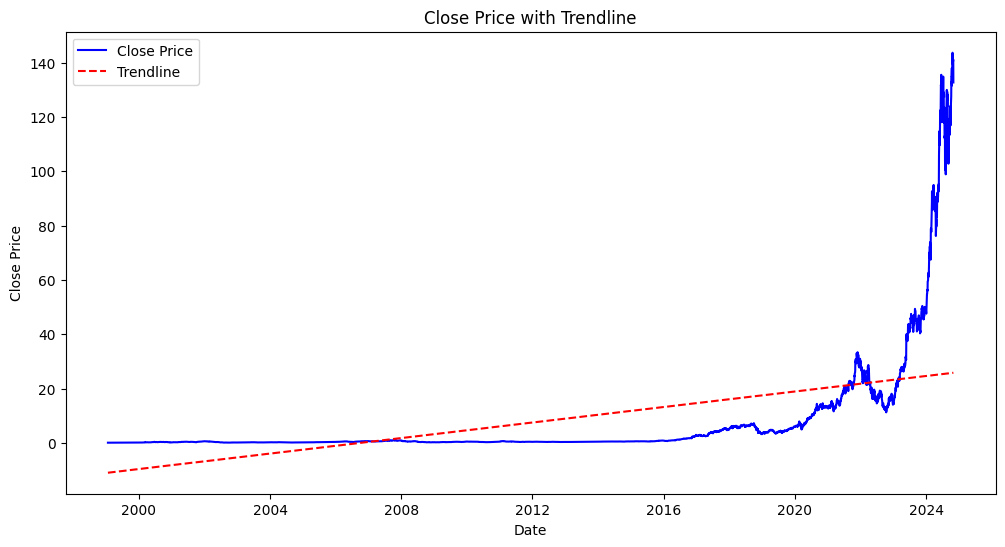

In [50]:
# Calculate the trendline
data['Trend'] = intercept + slope * data['Time']

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Close'], label='Close Price', color='blue')
plt.plot(data.index, data['Trend'], label='Trendline', color='red', linestyle='--')
plt.title('Close Price with Trendline')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

### Monthly Averages

<Figure size 1200x600 with 0 Axes>

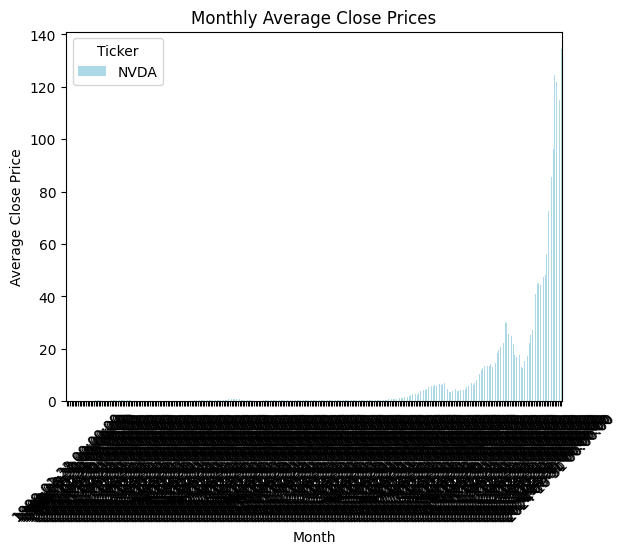

In [52]:
# Resample to monthly data and calculate the mean
monthly_avg = data['Close'].resample('M').mean()

# Plotting
plt.figure(figsize=(12, 6))
monthly_avg.plot(kind='bar', color='lightblue')
plt.title('Monthly Average Close Prices')
plt.xlabel('Month')
plt.ylabel('Average Close Price')
plt.xticks(rotation=45)
plt.show()

### Quarterly Averages

<Figure size 1200x600 with 0 Axes>

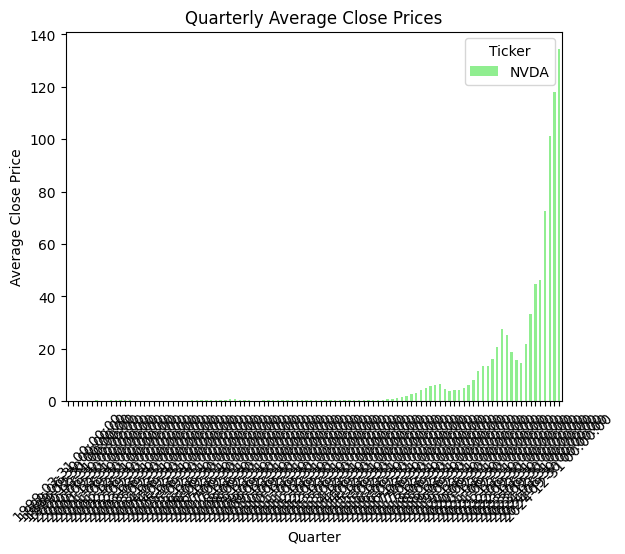

In [53]:
# Resample to quarterly data and calculate the mean
quarterly_avg = data['Close'].resample('Q').mean()

# Plotting
plt.figure(figsize=(12, 6))
quarterly_avg.plot(kind='bar', color='lightgreen')
plt.title('Quarterly Average Close Prices')
plt.xlabel('Quarter')
plt.ylabel('Average Close Price')
plt.xticks(rotation=45)
plt.show()


## Questions, Experiments and further analysis

### Growth Estimates Statistically Reasonable?

In [225]:
# nvidia.get_earnings_history()
# nvidia.get_analyst_price_targets()
# nvidia.get_balance_sheet()
# nvidia.get_recommendations()
print(nvidia.growth_estimates)

print(nvidia.get_growth_estimates())

       stock  industry  sector     index
0q   1.00000       NaN     NaN  0.045000
+1q  0.72300       NaN     NaN  0.096000
0y   1.38700       NaN     NaN  0.021000
+1y  0.43000       NaN     NaN  0.129000
+5y  0.57380       NaN     NaN  0.117607
-5y  0.66588       NaN     NaN       NaN
       stock  industry  sector     index
0q   1.00000       NaN     NaN  0.045000
+1q  0.72300       NaN     NaN  0.096000
0y   1.38700       NaN     NaN  0.021000
+1y  0.43000       NaN     NaN  0.129000
+5y  0.57380       NaN     NaN  0.117607
-5y  0.66588       NaN     NaN       NaN
